<a href="https://colab.research.google.com/github/alisonfung/Change-of-Scenery/blob/Welcome/Assignment_ClassificationHyperParameterTuning_TeHsin_Kung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##############################################
# Programmer Name:  Te Hsin Kung
# Class: CIS4321
# Programming Assignment: Decision Tree Hyper Parameter
# Date:10 Nov 2021
##############################################

In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 12]})
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
pd.set_option('display.float_format', lambda x: '%.5f' % x)
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 8]})

### **In this assignment you will be using `apple.csv` dataset contains 31 stock buying attribute. The target variable is called `buy` and its a binary label [0,1].**

- Using this dataset perform the following tasks:

In [ ]:
# import dataset
df = pd.read_csv('/content/apple.csv')

In [ ]:
df.head()

,close,volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,EMA_200,macd,signal,divergence,PPO,RSI,dn,mavg,up,pctB,fastK,fastD,slowD,KDJ,SMI,signal.1,MAD,WPR,CCI,adx,Typical_Price,Money_Flow_Ratio,Money_Flow_Index,buy
0,71.58714,62775300,70.00000,69.41100,65.09089,70.28966,68.48964,65.09089,0.65911,0.41071,0.24840,0.94877,60.88572,67.16386,69.45871,71.75357,0.96374,0.94950,0.92090,0.88152,1.00670,72.10132,46.23604,0.31293,-5.04981,177.16726,11.00177,71.56524,-1.97105,202.98091,0
1,72.07143,63398300,70.30128,69.52391,65.05908,70.61362,68.63010,65.16034,0.76527,0.48162,0.28365,1.09855,62.70957,67.31592,69.68871,72.06151,1.00209,0.99078,0.93998,0.91884,1.09238,81.55566,52.65779,0.39383,-0.92199,178.80187,11.23645,71.85524,-2.60140,162.44518,0
2,72.69857,72635500,70.67071,69.66071,65.03536,70.99270,68.78965,65.23535,0.88976,0.56325,0.32651,1.27314,64.98645,67.66327,69.98500,72.30673,1.08439,0.98806,0.97611,0.94567,1.01194,88.07179,59.09670,0.51946,-1.19432,207.60716,11.89597,72.56476,-3.71626,136.81527,0
3,74.48000,99526700,71.15086,69.85189,65.03133,71.62676,69.01280,65.32734,1.11926,0.67445,0.44481,1.59377,70.49701,67.16525,70.20443,73.24360,1.20341,0.93611,0.97165,0.96258,0.86504,89.12734,64.55681,0.67220,-6.38851,241.69470,13.68338,74.15143,-3.79903,135.72671,0
4,74.26714,133515900,71.70700,70.00191,65.02845,72.10683,69.21885,65.41629,1.26933,0.79343,0.47591,1.79979,69.09764,66.91390,70.42421,73.93453,1.04738,0.82898,0.91772,0.95516,0.65151,81.75685,67.68409,0.83472,-17.10187,184.45461,15.60401,74.11191,-2.09206,191.56988,0


### 1. Partition the data set to X, y and split the dataset into train and test datasets


In [ ]:
# define X and y
X = df.drop(columns=['buy'])
y = df['buy']



In [ ]:
# import triain_test_split class
#spliting data into 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### 2. Construct a dummy classifier with most frequent as the strategy and report classifier performance.


In [ ]:
# import dummyclassifier class and construct with most freq
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent', random_state=0)

In [ ]:
# fitting the data
dummy.fit(X_train, y_train)

# predicting the response
dummy_perd = dummy.predict(y_test)

# calculating the score
dummy.score(X_test, y_test)

0.5042372881355932

### 3. Construct a decision tree with the default parameters.


In [ ]:
# import decision tree class
from sklearn.tree import DecisionTreeClassifier

# fit desicion tree model
dt_model = DecisionTreeClassifier()

# fit the DT model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 4. Report confusion matrix and performance parameters


In [ ]:
# predict using the dt model
y_pred = dt_model.predict(X_test)

In [ ]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 97,  20],
       [ 18, 101]])

In [ ]:
# plot report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       117
           1       0.83      0.85      0.84       119

    accuracy                           0.84       236
   macro avg       0.84      0.84      0.84       236
weighted avg       0.84      0.84      0.84       236



### 5. Construct ROC curve and report AUC value.


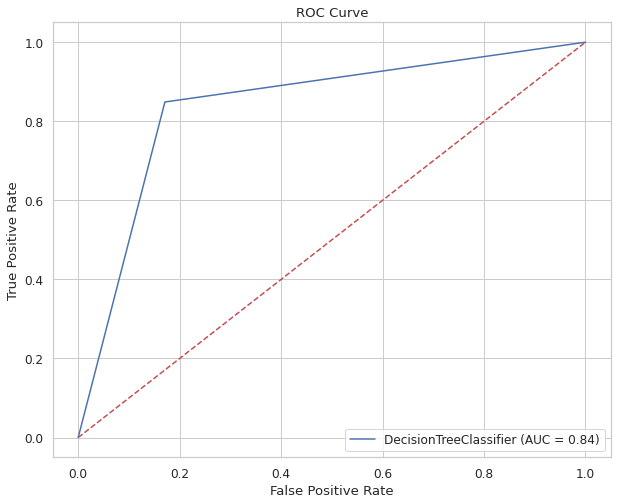

In [ ]:
# Plot Receiver operating characteristic (ROC) curve.
metrics.plot_roc_curve(dt_model, X_test, y_test)
plt.plot([0,1], [0,1], color='r', linestyle='--')
plt.title('ROC Curve');

### 6. Check for over fitting by comparing f1-score for training vs test data.


In [ ]:
# check if DT is over fit or not
metrics.accuracy_score(y_test, y_pred)

0.8389830508474576

In [ ]:
# prediction on X_test, y_train and compare the values
tree_predicted_test = dt_model.predict(X_test)
tree_predicted_train = dt_model.predict(X_train)

In [ ]:
# print and compare the score
print("The training accuracy score is: ", metrics.accuracy_score(tree_predicted_train, y_train))
print("The testing accuracy score is: ", metrics.accuracy_score(tree_predicted_test, y_test))

The training accuracy score is:  1.0
The testing accuracy score is:  0.8389830508474576


### 7. Fine tune Decision Tree parameter using GridSearch.


In [ ]:
# call the GridSearch class
from sklearn.model_selection import GridSearchCV

# specify what to search on
param_dist_grid = {
    'min_samples_leaf' : range(2,12,2),
    'max_depth': range(2,30,2),
    'criterion':['gini', 'entropy']
}
param_dist_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 30, 2),
 'min_samples_leaf': range(2, 12, 2)}

In [ ]:
# standard estimator
clf_tree = DecisionTreeClassifier()

In [ ]:
clf = GridSearchCV(clf_tree, param_dist_grid)

In [ ]:
# fit X_train and y_train
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
# print the tuned parameters and score
print("Tuned Decision Tree parameters: ", clf.best_params_)
print("Tuned Decision Tree Best Score is: ", clf.best_score_)

Tuned Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 6}
Tuned Decision Tree Best Score is:  0.8356630525437865


### 8. Show optimal parameters and performance metric post tuning step.


In [ ]:
# call best estimator to find optimal params
dt_model_best = clf.best_estimator_

In [ ]:
# predict X_test with the best estimator params
y_pred_best = dt_model_best.predict(X_test)

In [ ]:
# print classification report with best
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       117
           1       0.82      0.91      0.86       119

    accuracy                           0.85       236
   macro avg       0.86      0.85      0.85       236
weighted avg       0.86      0.85      0.85       236



In [ ]:
# predict the best model on X_test, y_train and compare the values
tree_predicted_test = dt_model_best.predict(X_test)
tree_predicted_train = dt_model_best.predict(X_train)

In [ ]:
# show the optimal scores
print("The training accuracy score is: ", metrics.accuracy_score(tree_predicted_train, y_train))
print("The testing accuracy score is: ", metrics.accuracy_score(tree_predicted_test, y_test))

The training accuracy score is:  0.8996350364963503
The testing accuracy score is:  0.8516949152542372


### 9. Show the top 5 most importance features


In [ ]:
# to see each importances features
dt_model.feature_importances_

array([0.00987561, 0.03724081, 0.02347233, 0.        , 0.00592537,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02454638, 0.03617416, 0.02506753, 0.        , 0.00596064,
       0.        , 0.10412942, 0.02051471, 0.        , 0.05357674,
       0.45267018, 0.01693935, 0.0142487 , 0.02531432, 0.03495372,
       0.0542593 , 0.02417298, 0.        , 0.01836635, 0.0125914 ])

In [ ]:
# show each columns
X.columns

Index(['close', 'volume', 'SMA_10', 'SMA_50', 'SMA_200', 'EMA_10', 'EMA_50',
       'EMA_200', 'macd', 'signal', 'divergence', 'PPO', 'RSI', 'dn', 'mavg',
       'up', 'pctB', 'fastK', 'fastD', 'slowD', 'KDJ', 'SMI', 'signal.1',
       'MAD', 'WPR', 'CCI', 'adx', 'Typical_Price', 'Money_Flow_Ratio',
       'Money_Flow_Index'],
      dtype='object')

In [ ]:
# show top 5 importance with name
for importance, name in sorted(zip(dt_model.feature_importances_, X.columns),reverse=True)[:5]:
    print (name, importance)

KDJ 0.45267018447284807
pctB 0.10412942026213702
CCI 0.054259300792702685
slowD 0.053576744801849305
volume 0.037240809248431955


In [ ]:
# define the features and the importances
features = X_train.columns
importances = dt_model.feature_importances_

# get the indices of these importance
indices = np.argsort(importances) #Returns the indices that would sort an array

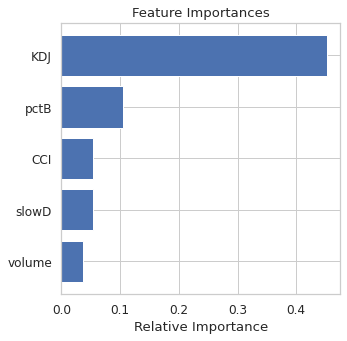

In [ ]:
# Customized number
num_features = 5

plt.figure(figsize=(5,5))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

### 10. Summarize your findings and discuss your results.

>When we first got our training accuracy score was 1.0(equals to 100%), on the testing accuracy score we had 0.84(84%). This means that the decision tree is over-fitting. Therefore, we optimized the decision tree by using GridSearch. We got our result values of training accuracy score is 0.90(90%) and it is closer to the testing accuracy score is 0.85(85%). Now we have an improved estimator that is prompt to over fit. It doesn't take all the data points and learn it on the training and didn't do well on the testing. We eliminate the datas from over-fitting.

>The bar chart above shows the top 5 most imortance features which are KDj, pctB, CCI, slowD and PPO. We can see that the most important features would be KDJ and pctB. Maybe we could eliminate and simplify the models by only using the top 2 highest importance features since CCI, slowD and PPO's importance are nearly equals to zero.